In [1]:
#|default_exp app

In [2]:
# Cannot export these bash commands
! pip install -Uqq fastai gradio

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

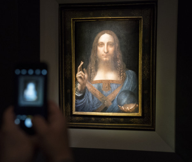

In [4]:
image = PILImage.create("da-vinci.jpg")
image.thumbnail((192,192))
image

In [5]:
#|export
learn = load_learner("export.pkl")

In [6]:
#|export

categories = ("da vinci", "titian", "michelangelo", "raphael")

def classify_image(img):
    prediction, index, probability = learn.predict(img)
    return dict(zip(categories, map(float, probability)))

In [7]:
classify_image(image)

{'da vinci': 0.9993081092834473,
 'titian': 1.5451178114744835e-05,
 'michelangelo': 4.3480195017764345e-05,
 'raphael': 0.0006329680327326059}

In [ ]:
#|export
image = gr.Image(height=270, width=270)
label = gr.Label()
examples = ["da-vinci.jpg", "titian.jpg", "michelangelo.jpg", "raphael.jpg"]

ui = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
ui.launch()

# Export

In [35]:

! pip install -Uqq nbdev
import nbdev

In [36]:
nbdev.export.nb_export('app.ipynb', './')
